In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sm
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

/Users/vitorhadad/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Automatic Differentiation

In [74]:
def f(r):
    return r*(1-r) 

In [75]:
w = sm.Symbol("w")
x = sm.Symbol("x")
y = sm.Symbol("y")
z = sm.Symbol("z")

x = f(w)
y = f(x)
z = f(y)

This is what the function looks like now. Not pretty.

In [76]:
z

w*(-w + 1)*(-w*(-w + 1) + 1)*(-w*(-w + 1)*(-w*(-w + 1) + 1) + 1)

<b>Manual differentation</b>

Tedious and error-prone.

In [77]:
def fprime(w):
    # Whew! That was a LOT of work!
    return w*(-w + 1)*(2*w - 1)*(-w*(-w + 1)*(-w*(-w + 1) + 1) + 1) +\
            w*(-w + 1)*(-w*(-w + 1) + 1)*(-w*(-w + 1)*(2*w - 1) \
            + w*(-w*(-w + 1) + 1) - (-w + 1)*(-w*(-w + 1) + 1)) -\
            w*(-w*(-w + 1) + 1)*(-w*(-w + 1)*(-w*(-w + 1) + 1) + 1) \
            + (-w + 1)*(-w*(-w + 1) + 1)*(-w*(-w + 1)*(-w*(-w + 1) + 1) + 1)

In [87]:
fprime(2) # EXACT 

-195

<b>Numeric Differentiation</b>

As seen in previous weeks.

In [79]:
def numerical_derivative(w, h):
    f = lambda w: w*(-w + 1)*(-w*(-w + 1) + 1)*(-w*(-w + 1)*(-w*(-w + 1) + 1) + 1)
    return (f(w) - f(w - h))/h

In [86]:
numerical_derivative(w = 2, h = 1e-6) # Approximate solution

-194.9995929777515

<b>Symbolic differentiation</b> (Using *sympy* module in Python)

In [88]:
def symbolic_differentiation(r):
    fprime = sm.diff(z, w) # This takes the *symbolic* derivative
    return fprime.evalf(subs = {"w": r}) # This substitutes "w" by the number 

In [89]:
symbolic_differentiation(1)

-1.00000000000000

<font color = "navy"><b>Automatic Differentiation</b></b>

A mixture of *both* numerical and symbolic derivatives

\begin{align*}
\frac{\partial z}{\partial w} 
&= f'(y)f'(x)f'(w) \\
&= f'(f(f(w)))f'(f(w))f'(w) 
\end{align*}

<b>Discussion</b>

+ What can you say about this expression? 

+ What stands out as repetition?

+ [Hard] Can you describe an algorithm to compute the derivative using the information above?

In [91]:
def automatic_differentiation(w):
    v, vprime = w, 1
    for i in range(3):
        v, vprime = v*(1-v), vprime - 2*v*vprime
    return vprime

In [92]:
automatic_differentiation(1) # MAGIC

-1

+ We could modify the algorithm to give *both* the value of the function $f$ and its gradient

+ Numerical derivatives could fail epically here (Irrelevant: why?)

+ [Out of our scope] Computing the *gradient* (multi-dimensional derivative) or the *directional derivative* is also easy using AD



<b>Reference</b>

Baydin, A. G., Pearlmutter, B. A., & Radul, A. A. (2015). Automatic differentiation in machine learning: a survey. arXiv preprint arXiv:1502.05767.

<hr>

# Activation Functions

In [36]:
g = tf.Graph()
sess = tf.InteractiveSession(graph=g)

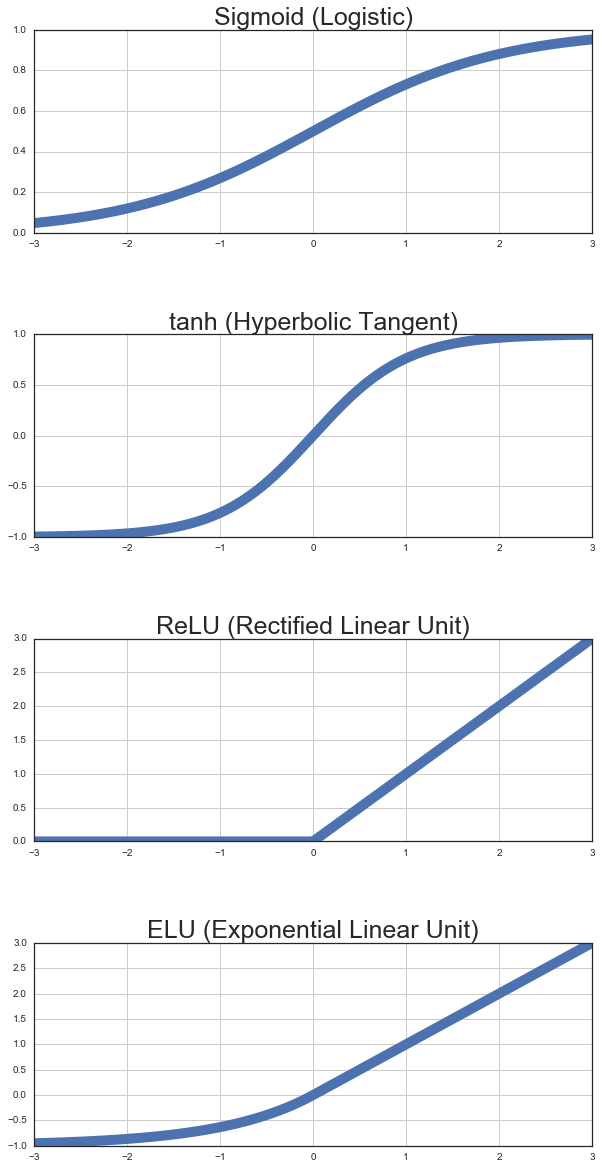

In [31]:
xs = np.linspace(-3, 3, 300)
sns.set_style("white")
fig, ax = plt.subplots(4, 1, figsize = (10, 20))
fig.subplots_adjust(hspace = .5)

ax[0].set_title('Sigmoid (Logistic)', fontsize = 25)
ax[0].plot(xs, tf.sigmoid(xs).eval(), linewidth = 10)
ax[0].grid()

ax[1].set_title('tanh (Hyperbolic Tangent)', fontsize = 25)
ax[1].plot(xs, tf.tanh(xs).eval(), linewidth = 10)
ax[1].grid()

ax[2].set_title('ReLU (Rectified Linear Unit)', fontsize = 25)
ax[2].plot(xs, tf.nn.relu(xs).eval(), linewidth = 10)
ax[2].grid()

ax[3].set_title('ELU (Exponential Linear Unit)', fontsize = 25)
ax[3].plot(xs,  tf.nn.elu(xs).eval(), linewidth = 10)
ax[3].grid()

<hr>

# Handwritten digit recognition: MNIST

This section was stolen verbatim from: https://www.tensorflow.org/versions/r0.7/tutorials/mnist/beginners/index.html

Get data

In [93]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


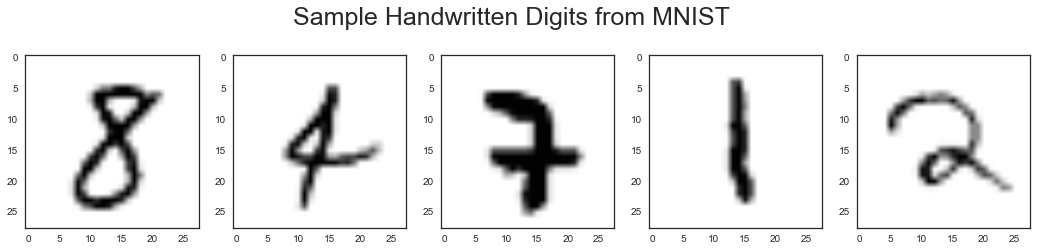

In [94]:
fig, ax = plt.subplots(1, 5, figsize = (18, 4))
for k in range(np.max(ax.shape)):
    ax[k].imshow(mnist.test.images[k + 299].reshape(28, 28))
fig.suptitle("Sample Handwritten Digits from MNIST", fontsize = 25)

Initialize variables

In [95]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y_ = tf.placeholder(tf.float32, [None, 10])

Model implementation

In [96]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

Define loss functions

In [97]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

Minimization directive

In [98]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

Launch a session and train model

In [99]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

Performance

In [100]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9132


<b>Discussion</b>

+ How can you expect to improve on this model?

More: http://playground.tensorflow.org/

<hr>

# Cool Stuff

+ Image recognition / Computer vision: from dog breed differentiation https://www.what-dog.net/ to Facebook for the visually impaired to self-driving cars

+ Unsupervised / Transfer / One-shot / Hierarchical learning: 

    + http://web.mit.edu/cocosci/Papers/tkgg-science11-reprint.pdf
    + https://web.stanford.edu/class/cs294a/sparseAutoencoder.pdf
    + http://ai.stanford.edu/~hllee/icml07-selftaughtlearning.pdf and video https://www.youtube.com/watch?v=n1ViNeWhC24

+ Unsupervised Representation Learning: https://github.com/Newmu/dcgan_code

+ Atari: https://www.youtube.com/watch?v=V1eYniJ0Rnk

+ Go: http://www.nature.com/news/google-ai-algorithm-masters-ancient-game-of-go-1.19234


<hr>

# References

+ High-level tutorial of deep learning: neuralnetworksanddeeplearning.com/

+ In-depth, academic: Yoshua Bengio's free textbook http://www.deeplearningbook.org/

+ Stanford CS231n - Convolutional Neural Networks for Visual Recognition: https://www.youtube.com/watch?v=NfnWJUyUJYU&list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC

+ Udacity: https://www.udacity.com/course/deep-learning--ud730

+ Nature Review article by Yann LeCun, Geoff Hinton, Yoshua Bengio (paywall)

Note: Advancements have piled up so fast in the last 5-10 years that there isn't much of a literature in textbook format out there yet. So if you are interested, the best way to learn this seems to be to take a course on neural networks, then proceed straight to academic journals and blogs. 